## Technical Challenge 

In [1]:
import meshio
import pyvista as pv
import numpy as np
import os
import math

In [2]:
for file in os.listdir('parts'):
    mesh = pv.read('parts/{}'.format(file))
    print(file)
    mesh.plot(color='grey', smooth_shading=True, split_sharp_edges=True)


89527_b3bf425d_0_simple.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa5c386d90_0&reconnect=auto' style='width…


89527_b3bf425d_10_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa75837a30_1&reconnect=auto' style='width…


89527_b3bf425d_14_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa78ed2970_2&reconnect=auto' style='width…


89527_b3bf425d_15_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa78e96850_3&reconnect=auto' style='width…


89527_b3bf425d_17_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa78e962b0_4&reconnect=auto' style='width…


89527_b3bf425d_18_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa78ed2c10_5&reconnect=auto' style='width…


89527_b3bf425d_19_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa7904e1c0_6&reconnect=auto' style='width…


89527_b3bf425d_1_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa7bb5d310_7&reconnect=auto' style='width…


89527_b3bf425d_21_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa79053c40_8&reconnect=auto' style='width…


89527_b3bf425d_22_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa0618a070_9&reconnect=auto' style='width…


89527_b3bf425d_23_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa7bb5dca0_10&reconnect=auto' style='widt…


89527_b3bf425d_24_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa061bf6a0_11&reconnect=auto' style='widt…


89527_b3bf425d_25_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa061f2790_12&reconnect=auto' style='widt…


89527_b3bf425d_26_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa061bfc70_13&reconnect=auto' style='widt…


89527_b3bf425d_29_simple.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06221130_14&reconnect=auto' style='widt…


89527_b3bf425d_2_simple.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa061f26a0_15&reconnect=auto' style='widt…


89527_b3bf425d_31_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06221580_16&reconnect=auto' style='widt…


89527_b3bf425d_32_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06eefb20_17&reconnect=auto' style='widt…


89527_b3bf425d_35_simple.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06274d60_18&reconnect=auto' style='widt…


89527_b3bf425d_36_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06274b50_19&reconnect=auto' style='widt…


89527_b3bf425d_38_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06eefd90_20&reconnect=auto' style='widt…


89527_b3bf425d_39_complex.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa06f18c40_21&reconnect=auto' style='widt…


89527_b3bf425d_40_simple.msh


Widget(value="<iframe src='http://localhost:51782/index.html?ui=P_0x1fa0efe61f0_22&reconnect=auto' style='widt…

In [3]:
def is_rectangular(mesh):
    
    num_vertex = 0
    num_line = 0
    num_triangle = 0
    
    for i in mesh.cells:
        if i.type == 'vertex':
            num_vertex += 1
        elif i.type == 'line':
            num_line += 1
        elif i.type == 'triangle':
            num_triangle += 1
    
    if num_vertex != 8:
        return 0
    if num_line != 12:
        return 0
    if num_triangle != 6:
        return 0
    
    
    def angle_between_vectors(v1, v2):
        return np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

    face_normals = []
    for triangle in mesh.cells_dict.get("triangle", []):
        v1, v2, v3 = [mesh.points[v] for v in triangle]
        edge1 = v2 - v1
        edge2 = v3 - v2
        face_normals.append(np.cross(edge1, edge2))

    for i in range(0, len(face_normals) - 1):
        angle = angle_between_vectors(face_normals[i], face_normals[i + 1])
        if np.degrees(angle) % 90 != 0:
            return 0
    
    else:
        return 1

In [4]:
def is_cylinder(mesh):
    
    max_height = 0
    min_height = 10**6
    min_area = 10**6
    
    for i in range(len(mesh.cells)):
        if mesh.cells[i].type == 'line':

            if len(mesh.cells[i].data) > max_height:
                max_height = len(mesh.cells[i].data)
                height = max_height

            if len(mesh.cells[i].data) < min_height:
                min_height = len(mesh.cells[i].data)
                radius = min_height

        elif mesh.cells[i].type == 'triangle':

            if len(mesh.cells[i].data) < min_area:
                min_area = len(mesh.cells[i].data)
                circle_area = min_area

    ratio = (circle_area * height * 4) / (radius**2/4 * height * math.pi)
    
    if ratio > 0.9 and ratio < 1.1:
        return 1
    else:
        return 0

In [5]:
import pandas as pd

msh_files = [file for file in os.listdir('parts')]

property_list = []

for msh_file in msh_files:

    mesh = meshio.read(os.path.join('parts/', msh_file));

    vertices = mesh.points
    cells = mesh.cells
    
    # Calculate average vertex distance to the centroid
    centroid = np.mean(vertices)
    vertex_distances = np.linalg.norm(vertices - centroid)
    avg_distance = np.mean(vertex_distances)
    
    # Calculate average cell area
    cell_areas = []
    for cell_block in cells:
        cell_data = cell_block.data
        if cell_block.type == "triangle":
            for cell_verts in cell_data:
                v0, v1, v2 = vertices[cell_verts]
                edge1 = v1 - v0
                edge2 = v2 - v0
                area = 0.5 * np.linalg.norm(np.cross(edge1, edge2))
                cell_areas.append(area)
    
    avg_cell_area = np.mean(cell_areas)
    total_area = np.sum(cell_areas)
    
    # calculating file properties
    num_points = len(mesh.points)
    num_cells = len(mesh.cells)
    num_vertex_group = 0
    num_line_group = 0
    num_triangle_group = 0
    num_vertex = 0
    num_line = 0
    num_triangle = 0
        
    for i in range(len(mesh.cells)):    

        if mesh.cells[i].type == 'vertex':
            num_vertex_group += 1
            num_vertex += len(mesh.cells[i].data)
        
        elif mesh.cells[i].type == 'line':
            num_line_group += 1
            num_line += len(mesh.cells[i].data)

        elif mesh.cells[i].type == 'triangle':
            num_triangle_group += 1
            num_triangle += len(mesh.cells[i].data) 
            
    properties = {
            "NumPoints": num_points,
            "NumCells": num_cells,
            "NumVertixGroups": num_vertex_group,
            "NumLineGroups":num_line_group,
            "NumTriangleGroups": num_triangle_group,
            "NumVertices": num_vertex,
            "NumLines": num_line,
            "NumTriangle": num_triangle,
            "Centroid": centroid,
            "AverageDistance": avg_distance,
            "AverageCellArea": avg_cell_area,
            "TotalCellArea": total_area,
            "IsRectangular": is_rectangular(mesh),
            "IsCylinder": is_cylinder(mesh),
            "Type": "simple" if "simple" in msh_file else "complex"      
        }

    property_list.append(properties)

df = pd.DataFrame(property_list)

In [6]:
df

,NumPoints,NumCells,NumVertixGroups,NumLineGroups,NumTriangleGroups,NumVertices,NumLines,NumTriangle,Centroid,AverageDistance,AverageCellArea,TotalCellArea,IsRectangular,IsCylinder,Type
0,17663,26,8,12,6,8,656,35322,0.011212,1160.170396,0.026312,929.382716,1,0,simple
1,15849,51,16,24,11,16,908,31694,0.512232,1028.928256,0.025997,823.953514,0,0,complex
2,23947,24,8,11,5,8,740,47898,-0.006262,1195.169990,0.025987,1244.724225,0,0,complex
3,23007,27,8,12,7,8,1346,46014,0.276402,1224.042947,0.026244,1207.585619,0,0,complex
4,8329,51,16,24,11,16,613,16654,0.577732,675.991117,0.025917,431.622277,0,0,complex
5,23542,91,28,43,20,28,2731,47096,0.589907,1245.474037,0.025902,1219.892282,0,0,complex
6,2707,37,12,17,8,12,253,5414,0.151728,312.328947,0.023951,129.669626,0,0,complex
7,4060,27,8,12,7,8,319,8116,1.209786,391.319958,0.025640,208.091960,0,0,complex
8,27344,22,7,10,5,7,967,54692,-0.017966,1476.177917,0.026345,1440.846847,0,0,complex
9,3215,45,14,21,10,14,575,6434,-0.745831,365.357630,0.024593,158.230424,0,0,complex


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import binary_crossentropy 
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Model configuration
batch_size = 32
loss_function = binary_crossentropy 
no_epochs = 100
verbosity = 0
num_folds = 10


X = df[df.columns[:-1]].astype(float)
y = df[df.columns[-1]]

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.5, random_state=42)

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
history_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# Initiating Best Model
best_loss = 10**6
best_accuracy = 0

fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Create the model
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(len(X.columns),)))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss=loss_function,
                  optimizer='adam',
                  metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    history_per_fold.append(history)
    
    # Finding best model
    if scores[0] < best_loss and scores[1] > best_accuracy:
        best_loss = scores[0]
        best_accuracy = scores[1]
        
        best_model = model
        best_fold = fold_no
        
    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 2.151166521390863e-18; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.0027007421012967825; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 15.895893096923828; accuracy of 33.33333432674408%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 5.337697982788086; accuracy of 50.0%
------------------------------------------------------------------------
Training for fold 5 ...


Score for fold 5: loss of 4.599960481423658e-14; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 6 ...


Score for fold 6: loss of 17.976476669311523; accuracy of 50.0%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss of 3.2019736766815186; accuracy of 50.0%
------------------------------------------------------------------------
Training for fold 8 ...
Score for fold 8: loss of 1.2506805433076806e-05; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 9 ...
Score for fold 9: loss of 7.321725148910774e-13; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 10 ...
Score for fold 10: loss of 2.051318883895874; accuracy of 50.0%


In [8]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.151166521390863e-18 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0027007421012967825 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 15.895893096923828 - Accuracy: 33.33333432674408%
------------------------------------------------------------------------
> Fold 4 - Loss: 5.337697982788086 - Accuracy: 50.0%
------------------------------------------------------------------------
> Fold 5 - Loss: 4.599960481423658e-14 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 6 - Loss: 17.976476669311523 - Accuracy: 50.0%
------------------------------------------------------------------------
> Fold 7 - Loss: 3.2019736766815186 - Accuracy: 50.0%

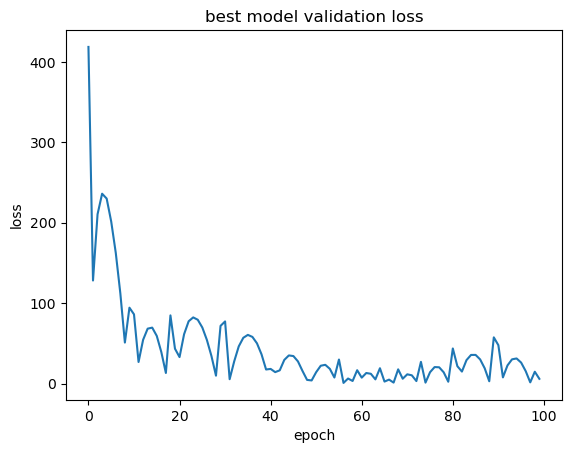

In [9]:
# Visualize history
# Plot history: Loss
plt.plot(history_per_fold[best_fold - 1].history['loss'])
plt.title('best model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [10]:
preds = best_model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


In [11]:
preds

array([[6.3241483e-23],
       [1.4448108e-20],
       [5.9260955e-30],
       [0.0000000e+00],
       [0.0000000e+00],
       [7.8358571e-26],
       [1.7631990e-25],
       [2.4647955e-12],
       [0.0000000e+00],
       [0.0000000e+00],
       [8.3622917e-32],
       [2.4282823e-30]], dtype=float32)

In [12]:
preds[preds <= max(preds)/10] = 0
preds[preds > max(preds)/10] = 1

In [13]:
preds.flatten()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Scratch Work

In [15]:
# algorithm:
## 1. check for obvious shapes first (sphere, cube/rectangular prism, cylinder) DONE
## 2. add "is_cylinder/is_square" feature DONE
## 3. num_vertices/triangles/lines feature DONE
## 4. make a column called "predicted" and set to T/F if already predicted
## 5. make a column "is not rectangle or cylinder"
## 6. train model to identify complex shapes. wide and shallow neural net for wide and small feature space DONE
## 7. consider multiple models, but likely will just use NN
## 8. can make additional training data 


# to do
## 1. write algorithm DONE
## 2. make draw.io diagram for system design DONE
## 3. use chatGPT to review theory

In [16]:
## To Do
# Have multiple models with respective perfomances and tabulate
## look at DSGA-1001 for inspiration
# Keep expanding feature space